<a href="https://colab.research.google.com/github/Aleksandra0001/DataScience/blob/main/HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np


# Часть первая: Знакомство с Pandas.


Прочитайте данные с помощью метода read_html из таблицы "Коефіцієнт народжуваності в регіонах України (1950—2019)" [по ссылке](https://uk.wikipedia.org/wiki/Населення_України#Народжуваність)

Вывести первые строки таблицы с помощью метода head

In [214]:
url="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
data = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України", thousands=".", decimal="," )[0]
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


Определите количество строк и столбцов в датафрейме (атрибут shape)

In [215]:
data.shape

(28, 9)

Замените в таблице значения "—" на значения NaN

In [216]:
data.replace("—", np.NaN, inplace=True)
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


Определите типы всех столбцов с помощью dataframe.dtypes

In [217]:
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"

In [218]:
data.iloc[:,-2:]=data.iloc[:,-2:].astype(float)
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [219]:
data.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

Удалите из таблицы данные по всей стране, последняя строчка таблицы

In [220]:
last_row=data.shape[0]-1
data.drop(last_row,axis=0, inplace=True)
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)

In [228]:
data=data.fillna(data.mean(numeric_only=True).round(1))
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0


Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [238]:
data[data['2019']>data['2019'].mean()]['Регіон']

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

В каком регионе была самая высокая рождаемость в 2014 году?

In [244]:
data[['2014', 'Регіон']].max()

2014              14.8
Регіон    Чернігівська
dtype: object

Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

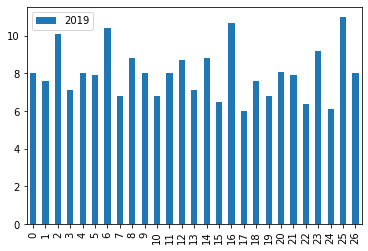

In [260]:
data[['2019', 'Регіон']].plot(kind='bar')